In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2020-2025-google-stock-dataset/google_5yr_one.csv


# DATA LOADING AND PREPROCESSING

In [2]:
df = pd.read_csv('/kaggle/input/2020-2025-google-stock-dataset/google_5yr_one.csv')
df

,Date,Close,High,Low,Open,Volume
0,NaN,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,2020-06-04,70.3785171508789,71.72309429138843,69.96599205492319,71.4971694316438,26982000
2,2020-06-05,71.65840148925781,71.9709103787135,70.0461071028752,70.44520002096422,42642000
3,2020-06-08,72.05748748779297,72.10525562528537,70.88509140875318,70.974667107052,33878000
4,2020-06-09,72.25852966308594,73.04079279119881,71.77484210279437,71.91816171630913,33624000
...,...,...,...,...,...,...
1251,2025-05-27,172.89999389648438,173.1699981689453,170.0,170.16000366210938,37995700
1252,2025-05-28,172.36000061035156,175.27000427246094,171.91000366210938,173.16000366210938,34784000
1253,2025-05-29,171.86000061035156,174.4199981689453,170.6300048828125,174.0,29373800
1254,2025-05-30,171.74000549316406,172.2100067138672,167.44000244140625,171.35000610351562,52639900


In [3]:
df = df.iloc[1:]
df

,Date,Close,High,Low,Open,Volume
1,2020-06-04,70.3785171508789,71.72309429138843,69.96599205492319,71.4971694316438,26982000
2,2020-06-05,71.65840148925781,71.9709103787135,70.0461071028752,70.44520002096422,42642000
3,2020-06-08,72.05748748779297,72.10525562528537,70.88509140875318,70.974667107052,33878000
4,2020-06-09,72.25852966308594,73.04079279119881,71.77484210279437,71.91816171630913,33624000
5,2020-06-10,72.88652801513672,73.28810385800969,72.37198974644225,72.72778683921254,31762000
...,...,...,...,...,...,...
1251,2025-05-27,172.89999389648438,173.1699981689453,170.0,170.16000366210938,37995700
1252,2025-05-28,172.36000061035156,175.27000427246094,171.91000366210938,173.16000366210938,34784000
1253,2025-05-29,171.86000061035156,174.4199981689453,170.6300048828125,174.0,29373800
1254,2025-05-30,171.74000549316406,172.2100067138672,167.44000244140625,171.35000610351562,52639900


In [4]:
df.isna().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 1 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1255 non-null   object
 2   High    1255 non-null   object
 3   Low     1255 non-null   object
 4   Open    1255 non-null   object
 5   Volume  1255 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB


In [6]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,1255,1255,1255,1255,1255,1255
unique,1255,1237,1255,1255,1255,1249
top,2020-06-04,105.46577453613281,71.72309429138843,69.96599205492319,71.4971694316438,22288000
freq,1,3,1,1,1,3


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('float').round(2)
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 1 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1255 non-null   datetime64[ns]
 1   Close   1255 non-null   float64       
 2   High    1255 non-null   float64       
 3   Low     1255 non-null   float64       
 4   Open    1255 non-null   float64       
 5   Volume  1255 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 59.0 KB


# VIZUALIZAION SECTION

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_style('whitegrid')

In [12]:
cols = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# LINE PLOT

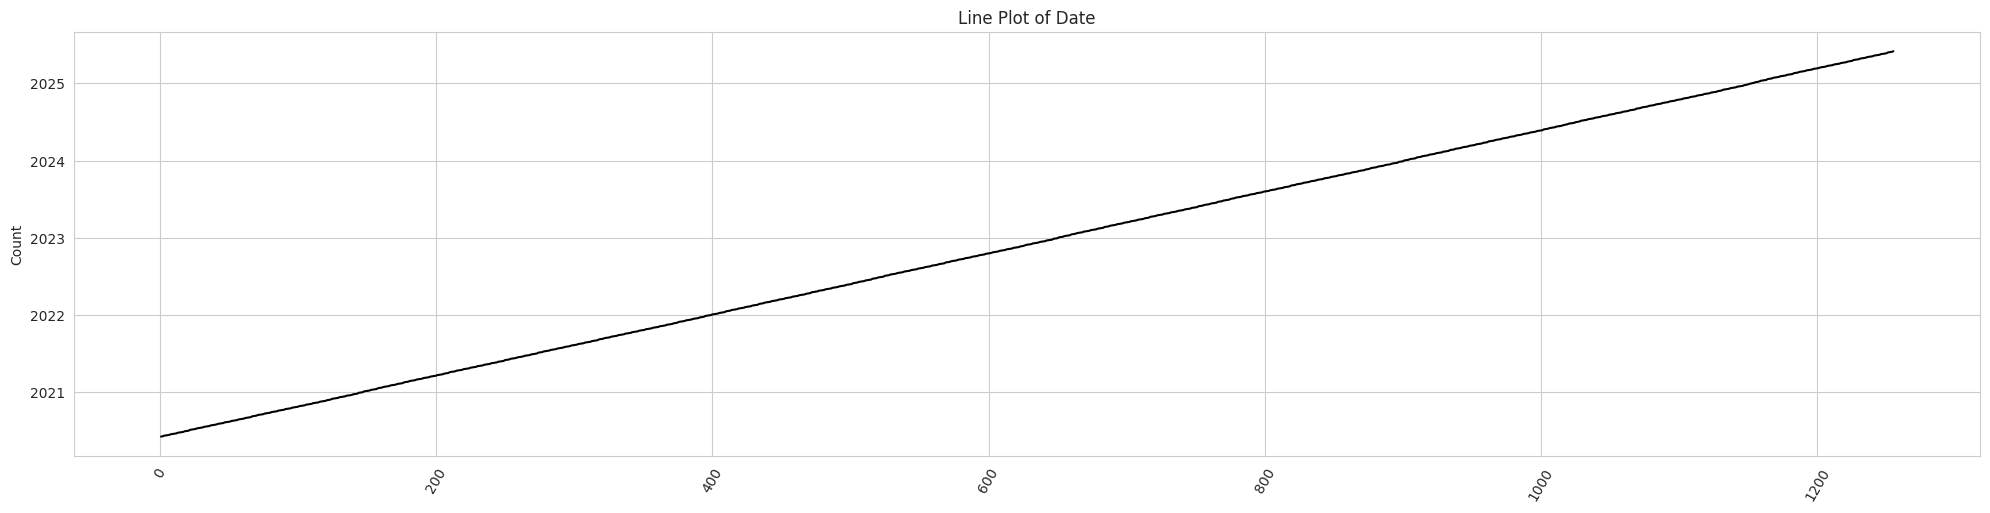

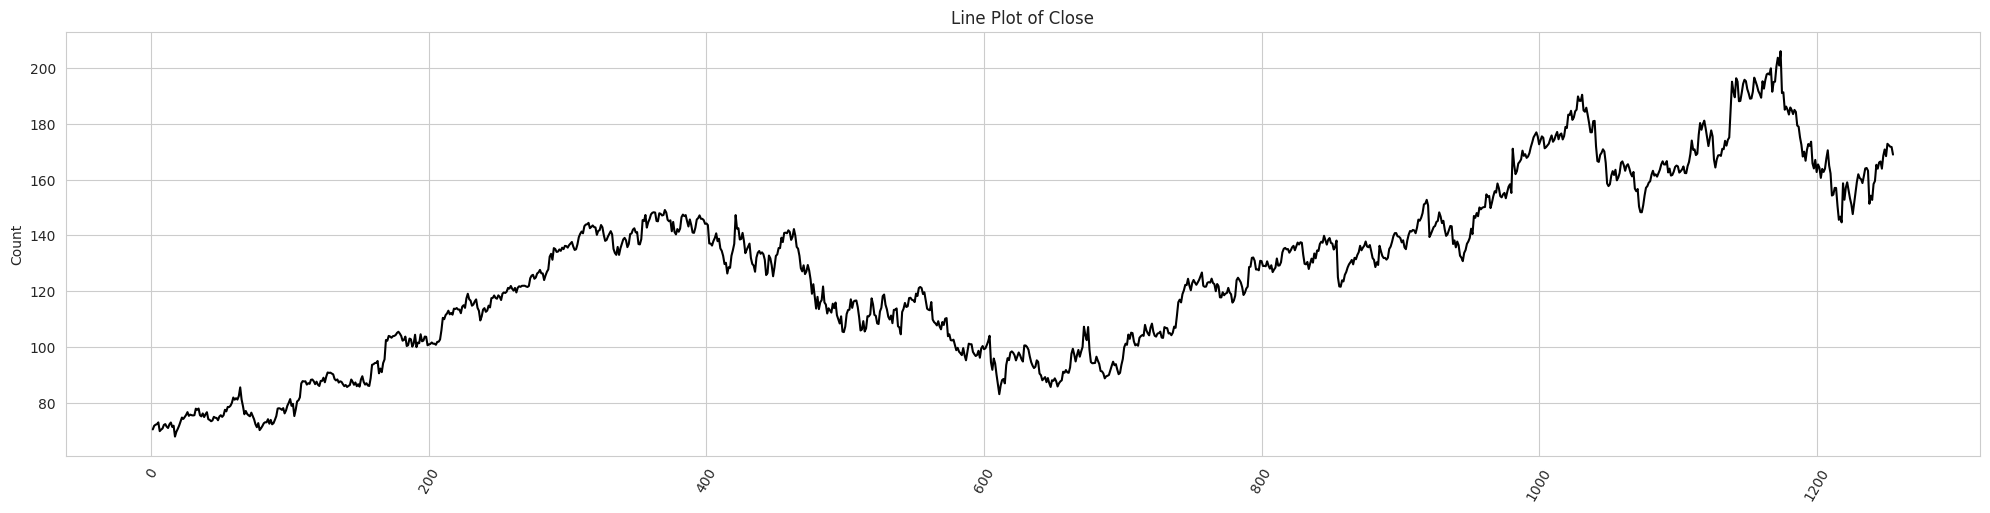

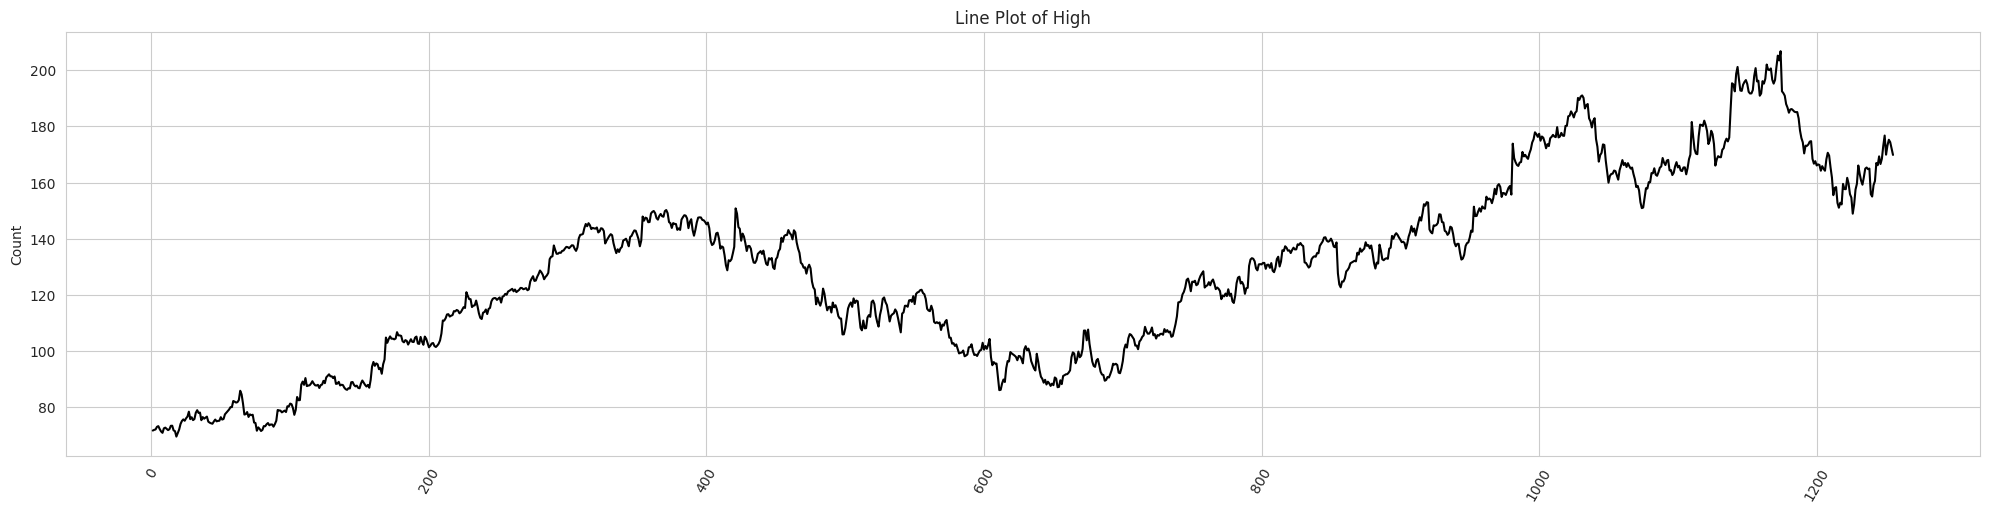

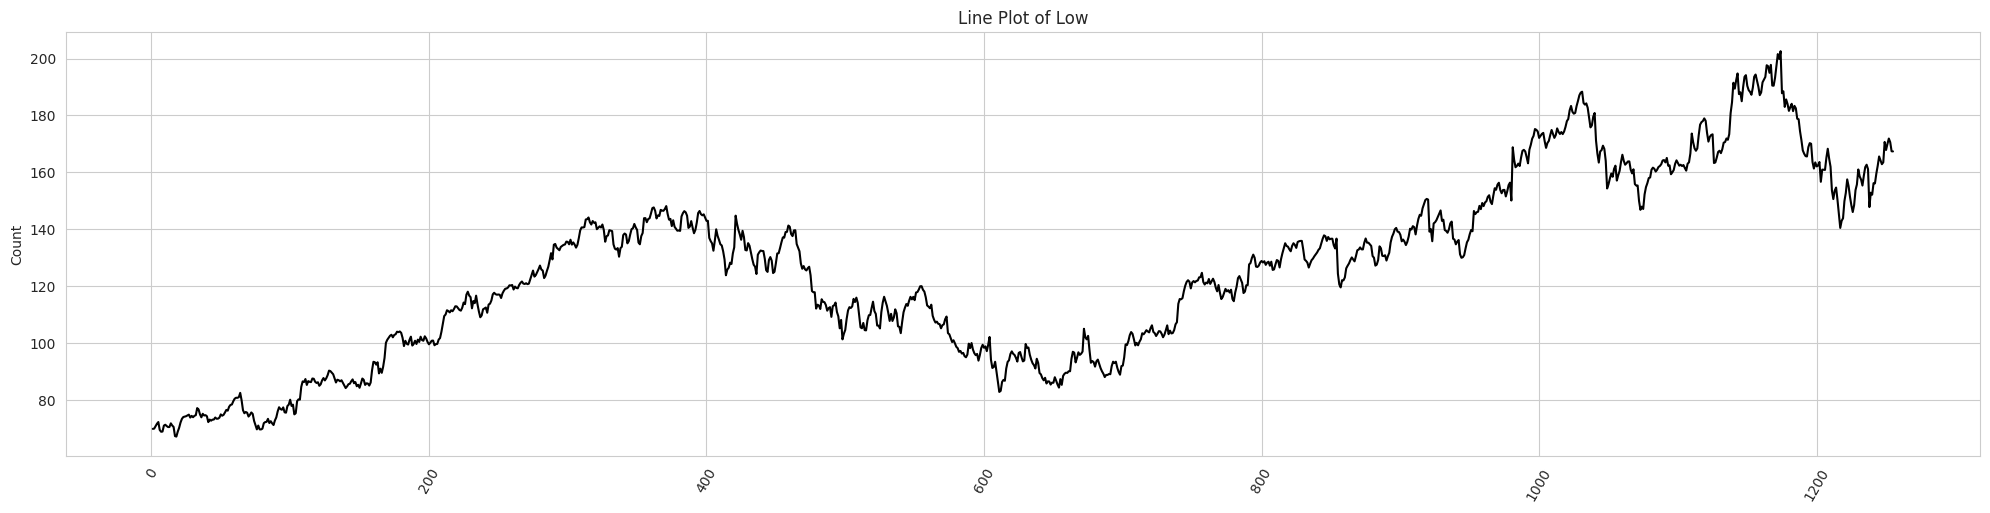

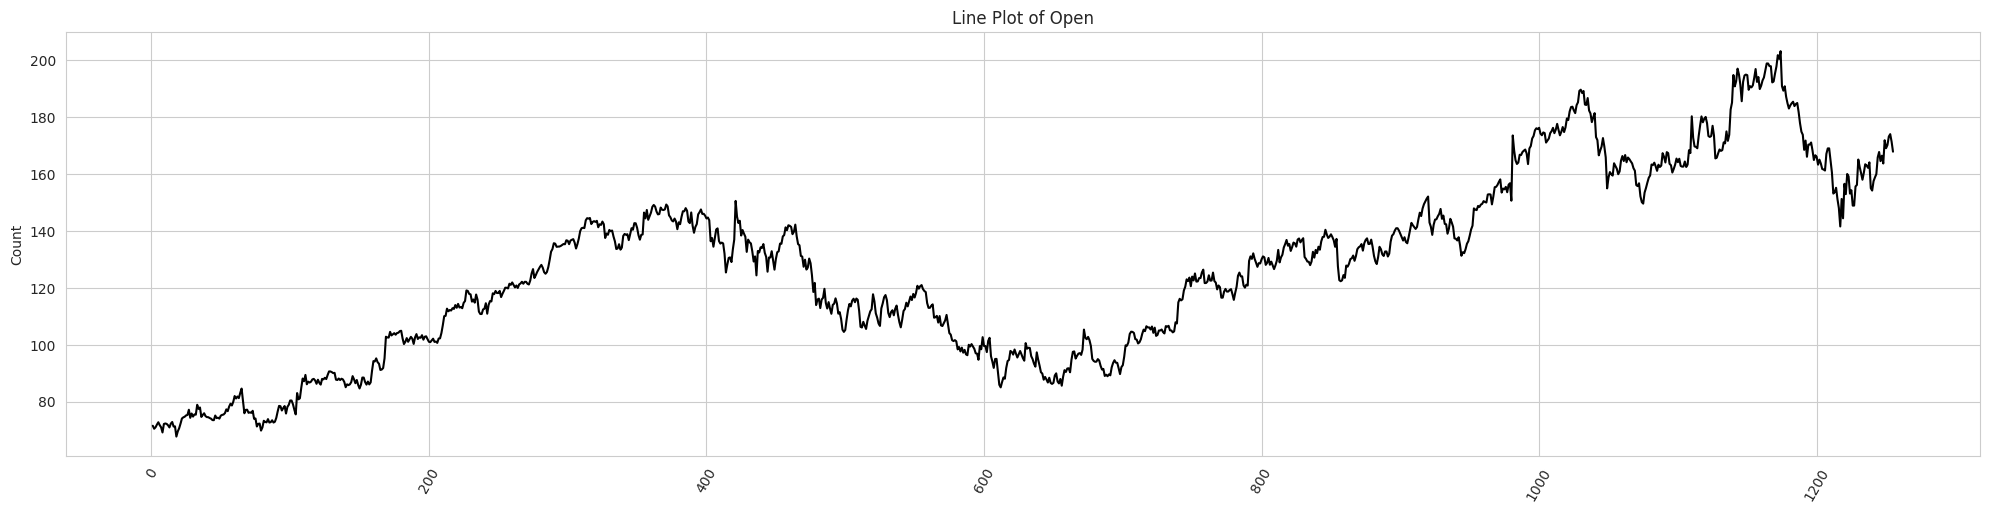

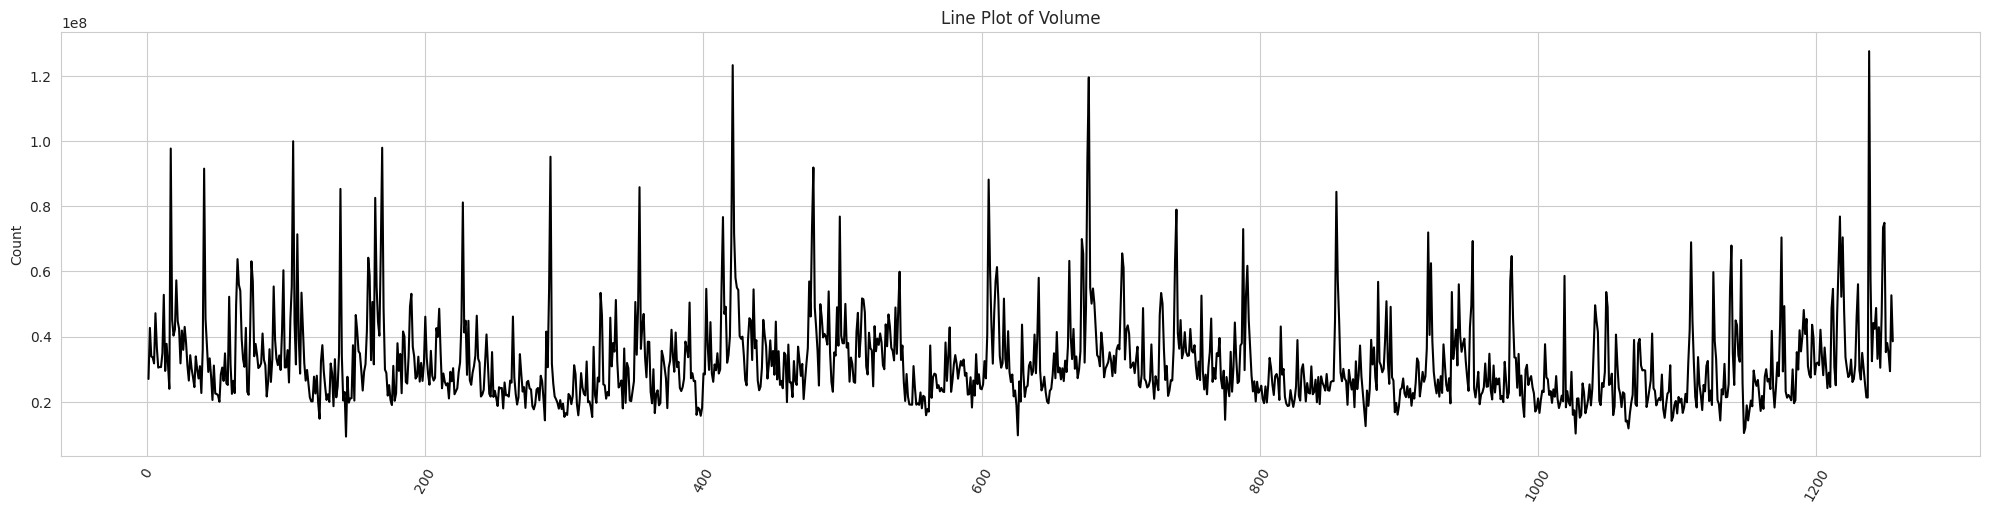

In [13]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.lineplot(df[features].dropna(),color='black')
        plt.title(f"Line Plot of {features}")
        # plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# ANN SECTION

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,f1_score,mean_absolute_error,mean_squared_error,classification_report,recall_score,precision_score

In [15]:
X = df.drop(columns=['Volume','Date'])
y = df['Volume']

In [16]:
X

,Close,High,Low,Open
1,70.38,71.72,69.97,71.50
2,71.66,71.97,70.05,70.45
3,72.06,72.11,70.89,70.97
4,72.26,73.04,71.77,71.92
5,72.89,73.29,72.37,72.73
...,...,...,...,...
1251,172.90,173.17,170.00,170.16
1252,172.36,175.27,171.91,173.16
1253,171.86,174.42,170.63,174.00
1254,171.74,172.21,167.44,171.35


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

2025-06-05 15:40:15.191084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749138015.460548      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749138015.539668      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [20]:
scaler_y = StandardScaler()

# Fix: convert Series to NumPy array first
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [21]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dense(1)
])

2025-06-05 15:40:31.499797: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [22]:
X_train_scaled

array([[ 1.78860874e+00,  1.73416287e+00,  1.79537577e+00,
         1.75017192e+00],
       [-8.45881410e-01, -8.66503802e-01, -8.45165072e-01,
        -8.38740517e-01],
       [ 3.10678230e-01,  2.92758557e-01,  3.26691244e-01,
         2.80434518e-01],
       ...,
       [ 1.27228748e+00,  1.23157814e+00,  1.27174684e+00,
         1.25807234e+00],
       [-3.19713385e-02, -2.93793382e-02, -4.20438870e-03,
        -1.07768344e-03],
       [ 1.14148609e+00,  1.13980450e+00,  1.16891368e+00,
         1.17558708e+00]])

In [23]:
model.compile(optimizer=Adam(),loss="mean_squared_error",metrics=["mse"])
model.fit(X_train_scaled,y_train_scaled,epochs=100,batch_size=32,validation_split=0.1)

y_pred = model.predict(X_test_scaled)
# y_pred_labels = (y_pred>0.5).astype(int).flatten()

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.9882 - mse: 0.9882 - val_loss: 0.9083 - val_mse: 0.9083
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0813 - mse: 1.0813 - val_loss: 0.8602 - val_mse: 0.8602
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9515 - mse: 0.9515 - val_loss: 0.9012 - val_mse: 0.9012
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9228 - mse: 0.9228 - val_loss: 0.8746 - val_mse: 0.8746
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9981 - mse: 0.9981 - val_loss: 0.8654 - val_mse: 0.8654
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9102 - mse: 0.9102 - val_loss: 0.8469 - val_mse: 0.8469
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9999 - mse: 0.9999 - val_loss: 0.8579 - val_mse: 0.8579
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8891 - mse: 0.8891 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.87

In [24]:
# print(classification_report(y_test,y_pred_labels))
mse = mean_squared_error(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 0.9977519495514529
MAE: 0.606206727958391
R2 Score: 0.37589575572014466


In [25]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred_actual = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Recompute real-world metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Actual MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("Actual MSE:", mean_squared_error(y_test_actual, y_pred_actual))
print("Actual R2:", r2_score(y_test_actual, y_pred_actual))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Actual MAE: 7746042.685258964
Actual MSE: 162907417595093.16
Actual R2: 0.3758957616220636


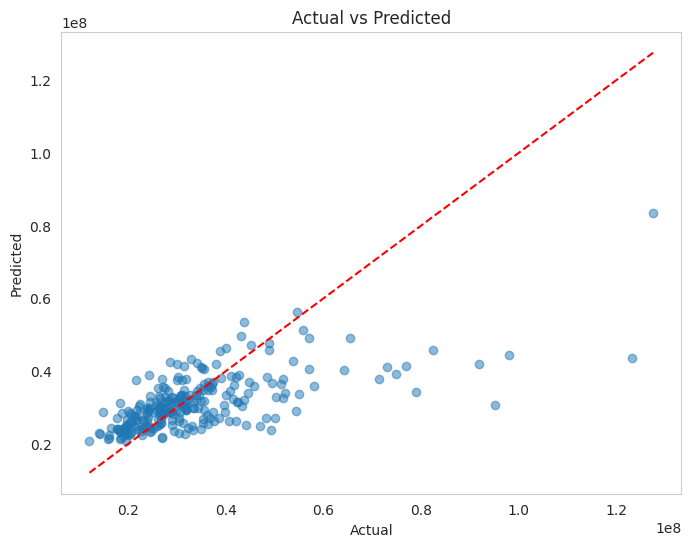

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()


# CONCLUSION:

> Getting r2 Score around ~39%